# 2. 간단한 분류 알고리즘 훈련

다음 주제를 다룬다.
* 머신 러닝 알고리즘을 직관적으로 이해하기
* 판다스, 넘파이 맷플롯립으로 데이터를 읽고 처리하고 시각화하기
* 파이썬으로 선형 분류 알고리즘 구현하기

## 2.1 인공 뉴런 : 초기 머신 러닝의 간단한 역사

퍼셉트론(perceptron)과 이와 관련된 알고리즘을 자세히 성명하기 전에 초창기 머신 러닝을 간단히 둘러보자. AI를 설계하기 위해 생물학적 뇌가 동작하는 방식을 이해하려는 시도로,
1943년 워런 맥컬록과 월터 피츠는 처음으로 간소화된 뇌의 누련 개념을 발표했다. 이를 **맥컬록-피츠** 뉴런이라고 한다. 뉴런들은 뇌의 신경 세포와 서로 연결되어 있다.


![](./img/IMG_60F094157B61-1.jpeg)


몇 년 후에 프랑크 로젠블라트는 MCP 뉴련 모델을 기반으로 페셉트론 학습 개념을 처음 발표했다.

### 2.1.1 인공 뉴런의 수학적 정의

좀 더 형식적으로 말하면 **인공뉴런(artificial neuron)** 아이디어를 두 개의 클래스가 있는 이진 분류 작업으로 볼 수 있다.
두 클래스는 간단하게 1(양성 클래스)과 -1(음성 클래스)로 나타낸다. 그 다음 입력 값 x와 이에 상응하는 가중치 벡터 w의 선형 조합으로 결정함수($\phi(z)$)를 정의한다.
최종 입력dls $z$는 $z= w_1x_1+\cdots+w_mx_m$이다.


$w = \begin{bmatrix}w_1\\ \vdots\\ w_m \end{bmatrix} , x =\begin{bmatrix}x_1\\ \vdots\\ x_m \end{bmatrix} $

이제 특정 샘플 $x^{(i)}$의 최종 입력이 사전에 정의된 임계 값 $\theta$보다 크면 클래스 1로 예측하고, 그렇지 않으면 클래스 -1로 에측한다.
퍼셉트론 알고리즘에서 결정 함수 $\phi(\cdot)$는 **단위 계단 함수**(unit step function)를 변형한 것이다.

$\phi(z)$ = 1 $z \geq \theta $ 일 때, -1 그  외

식을 간단하게 만들기 위해 임계 값 $\theta$를 식의 왼쪽으로 옮겨 $w_0 = -\theta$고 $x_0 = 1$ 0번째 가중치를 정의한다.
이렇게 하면 z를 좀 더 간단하게 쓸 수 있다.

$z = w_0x_0+ w_1x_1+ \cdots + w_mx_m = w^Tx$

머신 러닝 분야에서는 음수 임계 값 또는 가중치 $w_0$를 **절편**이라고 한다.


퍼셈트론 결정 함수로 최종 입력 $z = w^Tx$가 이진 출력(-1 또는 1)으로 압축되는 방법(왼쪽)과 이를 사용하여 선형 분리가 가능한 두 개의 클래스 사이를 구별하는 방법(오른쪽)을 보여 준다.


![](./img/IMG_374951DB0705-1.jpeg)



퍼셉트론 모델 이면에 있는 전반적인 아이디어는 뇌의 뉴런 하나가 작동하는 방식을 흉내 내려는 환원주의 접근 방식을 사용한 것이다.

1. 가중치를 0 또는 랜덤한 작은 값으로 초기화 한다.
2. 각 훈련 샘플 $x^{(i)}$에서 다음 작업을 한다.
    - 출력 값 $\widehat{y}$를 계산합니다.
    - 가중치를 업데이트한다.

여기서 출력 값은 앞서 정의한 단위 계단 함수로 예측한 클래스 레이블이다. 가중치 벡터 $w$에 있는 개별 가중치 $w_j$가 동시에 업데이트 되는 것을 다음과 같이 쓸 수 있다.

$$w_j := w_j + \triangle w_j$$


가중치 $w_j$를 업데이트하는 데 사용되는 $\triangle w_j$ 값은 퍼셉트론 학습 규칙에 따라 계산된다.

$\triangle w_j = \eta(y^i - \hat{y}^i)x^i_j$


여기서 $\eta$는
**힉습률**(learning rate)이다.(일반적으로 0.0에서 1.0 사이 실수이다.) $y^{(i)}$는 i번째 훈련 샘플의 **진짜 클래스 레이블**이다.
$\hat{y}^i$는
**에측 클래스 레이블**이다. 가중치 벡터의 **모든 가중치를 동시에 업데이트 한다는 점이 중요하다.** 즉, 모든 가중치 $\triangle w_j$
를 업데이트하기 전에 $\hat{y}^i$를 다시 계산하지 않습니다. 구체적으로 2차원 데이터셋에서는 다음과 같이 업데이트 된다.


$$\triangle w_0  = \eta(y^i - output^i)$$

$$\triangle w_1  = \eta(y^i - output^i)x^i_1$$

$$\triangle w_2  = \eta(y^i - output^i)x^i_2$$



$y^i = +1, \hat{y}^i = -1 , \eta = 1$

$x_j = 0.5$일 때 이 샘플을 -1로 잘못 분류했다고 가정한다. 이때 가중치가 1만큼 증가되어 다음 번에 샘플을 만났을 때 최종 입력
$x^i_j \times w^i_j$가 더 큰 양수가 된다. 샘플을 +1로 분류될 가능성이 높아질 것이다.

$$\triangle w^i_j = (1--1)\cdot 0.5 = (2)\cdot0.5 = 1$$

가중치 업데이트는 $x^i_j$ 값에 비례한다. 예를 들어 다른 샘플 $x^i_j = 2$를 -1로 잘못 분류했다면 이 샘플을 다음번에 올바르게 분류하기 위해 더 크게 결정 경계를 움직인다.

$$\triangle w^i_j = (1--1)\cdot 2 = (2)\cdot2 = 4$$

퍼셉트론은 두 클래스가 선형적으로 구분되고 학습률이 충분히 작을 때만 수렴이 보장된다.
두 클래스를 선형 결정 경계로 나눌 수 없다면 훈련 데이터셋을 반복할 최대 횟수(**에포크**(epoch))를 지정하고 분류 허용 오차를 지정할 수 있다. 그렇지 않으면 퍼셉트론은 가중치 업데이트를 멈추지 않는다.

![](./img/IMG_EC245541F2EB-1.jpeg)



## 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

### 2.2.1 객체 지향 퍼셉트론 API

퍼셉트론 구현은 다음과 같습니다.

In [5]:
import numpy as np

class Perceptron(object):
    """
    퍼셉트론 분류기

    매개변수
    -----------------
    eta : float
        학습률 (0.0과 1.0사이)
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------------
    w_ : 1d-array
        학습된 가중치
    errors_ : list
        에포크마다 누적된 분류 오류
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        훈련데이터 학습
        :param X: {array-like}, shape = [n_samples, n_features]
                n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        :param y: array-like, shape = [n_samples]
                target value
        :return:
        self : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale=0.01, size=1 +X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

            self.errors_.append(errors)
        return self


    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:] + self.w_[0])

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환한다."""

        return np.where(self.net_input(X) >= 0.0, 1, -1)

퍼셉트론 구현을 사용하여 학습률 eta와 에포크 횟수 n_iter로 새로운 perceptron 객체를 초기화 한다. fit 메서드에서 self.w_ 가중치
벡터 $R^{m+1}$로 초기호한다. 여기서 m은 데이터셋에 있는 차원 개수이다. 벡터의 첫 번째 원소인 절편을 위해 1을 더한다.

이 벡더는 rgen.normal(loc = 0.0, scale=0.01, size=1 + X.shape[1])을 사용하여 표준 편차가 0,01인 정규 분포에서 뽑은 랜덤한 작은 수를 담고 있다.

가중치를 0으로 초기화하지 않는 이유는 가중치가 0이 아니어야 학습률 $\eta$가 분류 결과에 영향을 주기 때문이다.

In [6]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1

np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

np.arccos 함수는 역코사인 삼각 함수고 np.linalg.norm은 벡터 길이를 계산하는 함수이다.

fit 메서드는 가중치를 초기화한 후 훈련 세트에 있는 모든 개개의 샘플을 반복 순회하면서 이전 절에서 설명한 퍼셉트론 학습 규칙에 따라 가중치를 업데이트한다.
클래스 레이블은 predict 메서드에서 예측한다. fit 메서드에서 가중치를 업데이트하기 위해 predict메서드를 호출하여 클래스 레이블에 대한 예측을 얻는다.
predict 메서드는 모델이 학습되고 난 후 새로운 데이터의 클래스 레이블을 예측하는 데도 사용할 수 있다. 에포크마다 self.errors_ 리스트에 잘못 분류된 횟수를 기록한다.
나중에 훈련하는 동안 얼마나 퍼셉트론을 잘 수행했는지 분석 할 수 있다. np.dot 함수는 벡터 접곱 $w^Tx$를 계산한다.

### 2.2.2 불꽃 데이터셋에서 퍼셉트론 훈련

* note
        이따금 OVR(One-versus-Rest)이라고도 하는 OVA(One-versus-All) 기법을 사용하여 이진 분류기를 다중 클래스 문제에 적용할 수 있다. OVA를 사용할 때 클래스마다
        하나의 분류기를 훈련한다. 각 클래스는 양설 클래스로 취급되고 다른 클래스의 샘플은 모두 음석 클래스로 생각한다. 새로운 데이터 샘플을 분류할 때는 클래스 레이블의 개수와 같은 n개의 분류기를 사용한다.
        신뢰도가 가장 높은 클래스 레이블을 샘플에 할당한다. 페섭트론은 OvA를 사용하여 최종 입력의 절댓값이 가장 큰 클래스를 레이블로 선택한다.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris


df = pd.DataFrame(data = load_iris().data, columns=load_iris().feature_names)
df['target'] = load_iris().target

df.tail()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
df.loc[df.target==0,'target']=-1

df.loc[df.target==2,'target']=1

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [21]:
y = df.loc[0:100, 'target']
X = df.loc[0:100,['sepal length (cm)', 'petal length (cm)']].values

pd.unique(df.loc[:100,'target'])

array([-1,  1])

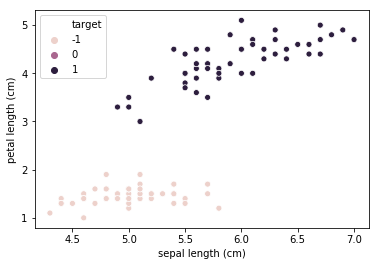

In [22]:
sns.scatterplot(data = df[['sepal length (cm)', 'petal length (cm)','target']][:100], x='sepal length (cm)',y='petal length (cm)' , hue='target')


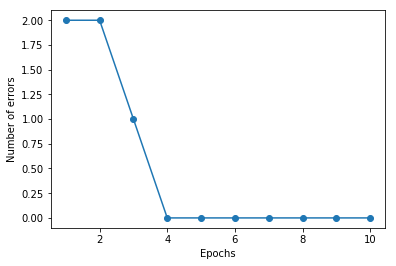

In [23]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

퍼셉트론은 여섯 번째 에포크 이후에 수렴했고 훈련 샘플을 완벽하게 분류했다.

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그린디.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravel 배열을 1차원으로 reshape(-1)이랑 같음
    print(pd.Series(Z).value_counts())
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='black')

먼저 colors와 markers를 정의하고 ListedColormap을 사용하여 colors 리스트에서 컬러맵을 만든다. 두 특성의 최솟값과 최댓값을
찾고 이 벡터로 넘파이 meshgrid(meshgrid x 값의 배열과 y 값의 배열로 직사각형 격자를 만드는 것이 목적) 함수로 그리드 배열 xx1과 xx2 쌍을 만든다.
두 특성의 차원에서 퍼셉트론 분류기를 훈련했기 때문에 그리드 배열을 펼치고 훈형 데이터와 같은 개수의 열이 되도록 행렬을 만든다.
predict 메서드로 그리도 각 포인트에 대응하는 레이블 Z를 예측한다.

클래스 레이블 z를 xx1, xx2 같은 차원의 그리도 크기를 변경한 후 맷플롯립의 contourf 함수로 등고선 그래프를 그린다. 그리드 배열에 대한 예측한 클래스를 각기 다른 색깔로 맵핑하여 결정 영역을 나타낸다.

 1    47098
-1    35152
dtype: int64


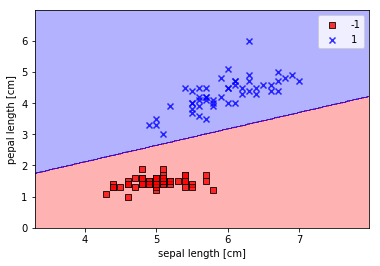

In [26]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("sepal length [cm]")
plt.ylabel("pepal length [cm]")
plt.legend()
plt.show()

퍼셉트론이 두 개의 붓꽃 클래스를 완벽하게 분류했지만 퍼셉트론의 가장 큰 문제점은 수렴에 있다.
퍼셉트론 학습 규칙이 두 개의 클래스가 선형적인 초평면으로 구분될 수 있을 때 수렴한다는 것을 수학적으러 증명했다. 선형 결정 결계로 완벽하게 클래스가
구분되지 않는다면 최대 에포크를 지정하지 않는 한 가중치 업데이트 과정이 멈추지 않는다.


## 2.3 적응형 선형 뉴런과 학습의 수렴

단일츨 신경망의 또 다른 종류인 **적응형 선형 뉴런**을 살펴보자! 아달린은 퍼셉트론의 향상된 버전으로 볼 수 있다.

아달린은 연속 함수로 비용 함수를 정의하고 최소화하는 핵심 개념을 보여 주기 때문에 아주 흥미롭다. logistic regression, SVM, 회귀 모델을 이해하는 데 도움이 될 것이다.

아달린 규칙(위드로우-호프 규칙이라고도 함)과 로젠블라트 페섭트론의 가장 큰 차이점은 가중치를 업데이트하는 데 퍼셉트론 처럼 단위 계단 함수 대신 선형 활성화 함수를 사용하는 것이다.

$$\phi(w^Tx) = w^Tx$$

선형 활성화 함수가 가중치 학습에 사용되지만 최종 예측을 만드는 데 여전히 임계 함수를 사용한다.

|페셉트론|아달린|
|---|----|
|![퍼셉트론](./img/IMG_ED224B6068B8-1.jpeg)|![아달린](./img/IMG_BE88EA4EEFD4-1.jpeg) |



아달린 알고리즘은 진짜 클래스 레이블과 선형 활성화 함수의 실수 출력 값을 비교하여 모델의 오차를 계산하고 가중치를 업데이트한다. 반대로 페셉트론은 진짜 클래스 레이블과 예측 클래스 레이블을 비교한다.


### 2.3.1 경사 하강법으로 비용 함수 최소화

지도 학습 알고리즘의 핵심 구성 요소는 학습 과정 동안 최적화하기 위해 정의한 **목적 함수**(object function)이다. 종종 최소화하려는 비용 함수가 목적 함수가 된다.
아달린은 계산된 출력과 진짜 클래스 레이블 사이의 **제곱 오차합**으로 가중치를 학습할 비용함수 J를 정의한다.


$$J(w) = \frac{1}{2} \sum_i(y^{(i)} - \phi(z^{(i)}))^2$$

$\frac{1}{2}$항은 그래디언트를 간소하게 만들려고 편의상 추가한 것이다.
단위 계산 함수 대신 연속적인 선형 활성화 함수를 사용하는 장점은 비용함수가 미분 가능해진다는 것이다. 이 비용함수의 또 다른 장점은 볼록 함수라는 것이다.
간단하지만 강력한 최적화 알고리즘 **경사 하강법**을 적용해 비용함수를 최소화 하는 가중치를 찾을 수 있다.

**경사 하강법 이면에 있는 핵심 아이디어를 지역 또는 전역 최솟값에 도달할 때까지 언던을 내려오는 것으로 묘사한다.**
진행의 크기는 경사의 기울기와 학습률로 결정한다.

![](./img/IMG_A4B88749AC5B-1.jpeg)


경사 하강법을 사용하면 비용 함수 $J(w)$의 그래이언드 $\Delta J(w)$ 반대 방향으로 가중치를 업데이트 한다.

$$w := w + \triangle w$$

가중치 변화량 $\triangle w$는 음수의 그래디언트에 학습률 $\eta$를 곱한 것으로 정의한다.

$$\triangle w = -\eta \Delta J(w)$$

비용 함수의 그래디언트를 계산하려면 각 가중치 $w_j$에 대한 편도 함수를 계산해야 한다.

$$\frac{\delta J}{\delta w_j} = -\sum_i(y_i - \phi(z^i))x^i_j$$

따라서 가중치 $w_j$의 업데이트 공식을 다음과 같이 쓸 수 있다.

$$\triangle w_j = -\eta \frac{\delta J}{\delta w_j} = \eta \sum_i(y_i-\phi(z^i))x^i_j$$

아달린 학습 규칙이 퍼셉트론 규칙과 동일하게 보이지만 $z^i = w^Tx^i$인 $\phi(z^i)$는 정수 클래스 레이블이 아니고 실수이다.
훈련 세트에 있는 모든 샘플을 기반으로 가중치 업데이트를 계산한다. 이 방식을 배치 경사 하강법이라고 한다.

<br><br><br>

### 2.3.2 파이썬으로 아달린 구현

In [14]:
class AdalineGD(object):
    """ 적응형 선형 뉴런 분류기

    매개변수
    --------------------
    eta : float
        학습률 (0.0과 1.0사이)
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    --------------------
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        에포크마다 누적된 비용 함수의 제곱합

    """


    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

퍼셉트론처럼 개별 훈련 샘플마다 평가한 후 가중치를 업데이트하지 않고 전체 훈련 데이터셋을 기반으로 그래디언트를 계산한다. 절편은 self.eta * errors.sum()
가중치 1에서 m 까지는 self.eta *X.T.dot(errors)이다. 여기서 X.T.dot(errors)는 특성 행렬과 오차 벡터 간의 행렬-벡터 곱셉이다.

이 코드의 activation 메서드는 단순한 항등 함수이기 때문에 아무런 영향을 미치지 않는다. 단일층 신경망을 통해 정보가 어떻게 흘러가는지를 표시하려고 활성화 함수를 추가했다.
입력 데이터의 특성에서 최종 입력, 활성화, 출력 순으로 진행된다.

실전에서는 최적으로 수렴하는 좋은 학습률 $\eta$를 찾기 위해 여러 번 실험을 해야 한다. 두 개의 학습률 $\eta = 0.1$과 $\eta = 0.0001$을 선택 해보자.
에포크 횟수 대비 비용함수의 값을 그래프로 나타내면 아달린 구현이 훈련 데이터에서 얼마나 잘 학습하는지 볼 수 있다.

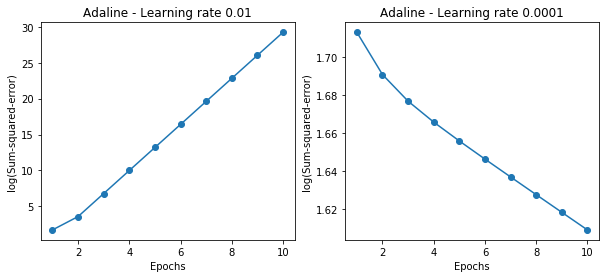

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

adal = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(adal.cost_) +1), np.log10(adal.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

adal_2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(adal_2.cost_) +1), np.log10(adal_2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

출력된 비용 함수 그래프에서 불 수 있듯이 두 개의 다른 문제가 발생했다.
왼쪽 그래프는 학습률이 너무 클 때 발생한다. 비용함수를 최소화하지 못하고 오차는 에포크마다 점점 커진다. 전역 최솟값을 지나쳤기 때문이다. 반면 오른쪽 그래프에서는 비용이 감소하지만 학습률 $\eta =0.0001$은 너무 작기 때문에 전역 최솟값에 수렴하려면 많은 에포크가 필요하다

### 2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상


경사 하강법은 특성 스케일을 조정하여 혜택을 볼 수 있는 많은 알고리즘 중 하나이다. 

표준화라고 하는 특성 스케일 방법을 사용한다. 데이터에 표준 정규 분포의 성징을 부여하여 경사 하강법 학습이 좀더 빠리게 수렵되도록 돕는다.

$$x^{'}_j = \frac{x_j-u_j}{\sigma_j}$$

표준화가 경사 하강법 학습에 도움이 되는 이유 중 하나는 아래 그림 처럼 더 적은 단계를 거쳐 최적 혹은 좋은 솔루션을 찾기 때문이다. 

![](./img/IMG_EAD1BBB4FAE4-1.jpeg)

In [9]:
# 표준화

x_std = np.copy(X)
x_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
x_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

 1    48303
-1    35978
dtype: int64


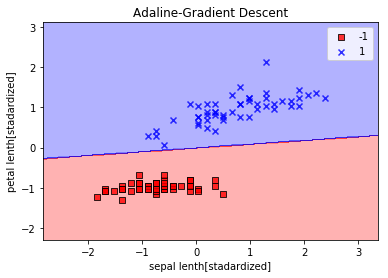

In [19]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(x_std, y)

plot_decision_regions(x_std, y, classifier=ada)
plt.title("Adaline-Gradient Descent")
plt.xlabel("sepal lenth[stadardized]")
plt.ylabel("petal lenth[stadardized]")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Adaline - Standardization')

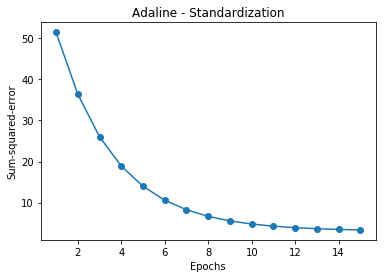

In [21]:

plt.plot(range(1, len(ada.cost_) +1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Standardization')



### 2.3.4 대규모 머신 러닝과 확률적 경사 하강법

* 배치 경사 하강법 : 전체 훈련 세트에서 계산한 드래디언트의 반대 방향으로 한 걸을씩 진행하여 비용 함수를 최고화하는 방법
    - 데이터셋이 매우 큰 경우 계산 비용이 많이 든다.

* 확률적 경사 하강법 : 첫 번쨰 수칙 처럼 모든 샘플 $x^{(i)}$에 대하여 누적된 오차의 합을 기반으로 가중치를 업데이트하는 대신 두 번째 수식처럼 각 훈련 샘플에 대해서 조금씩 가중치를 업데이트한다.

$$\triangle w = \eta \sum_i(y^{(i)} - \phi(z^{(i)})x^{(i)}$$

$$\triangle w = \eta (y^{(i)} - \phi(z^{(i)})x^{(i)}$$


확률적 경사 하강법을 경사하강버의 근사로 생각할 수 있지만 가중치가 더 자주 업데이트되기 떄문에 수렴 속도가 훨씬 빠르다. 그래디언트가 하나의 훈련 샘플을 기반으로 계산되므로 오차의 궤적은 배치 경사 하강법보다 훨씬 어지럽다. 

비선형 비용 함수를 다룰 떄 얕은 지역 최솟값을 더 쉽게 탈출할 수 있어 장접이 되기도 한다. 


Note

확률적 경사 하강법 구현에는 종종 고정된 학습률 $\eta$를 시간이 지남에 따라 적응적인 학습률로 대체한다.


$$ \frac{c_1}{[number-of-iterations] + c_2 }$$

 여기서 $c_1$과 $c_2$는 상수이다. 확률적 영사 하강법은 전역 최솟값에 도달하지 못하지만 매우 가까운 지역에 근접한다. 적응적 학습률을 사용하면 최솟값에 더욱 가깝게 다가갈 수 있다.


확률적 경사 하강법의 또 다른 장점은 **온라인 학습**으로 사용할 수 있다는 것이다.
온라인 학습에서 새로운 훈련 데이터가 도착하는 대로 훈련된다. 많은 양의 훈련 데이터가 있을 떄도 유용하다.
온라인 학습을 사용해서 시스템은 변화에 즉시 적응한다. 저장 공간에 제약이 있다면 모델을 업데이트한 후 훈련 데이터를 버릴 수 있다.

Note

배치 경사 하강법과 확률적 경사 하강법 사이의 절출점이 미니 배치 학습이다.



확률적 경사 하강법으로 아달린 구현

fit 메서드 안에서 각 훈련 샘플에 대해 가중치를 업데이트할 것이다. 추가로 partial_fit 메서드도 구현하겠다. 이 메서드는 가중치를 다시 초기화하지 않아
온라인 학습에서 사용할 수 있다. 훈련 후에는 알고리즘이 수렴하는지 확인하려고 에포크마다 훈련 샘플의 평균 비용을 계산한다.

In [29]:
class AdalineSGD(object):

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []

            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self


    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습한다."""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])

        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)

        else:
            self._update_weights(X, y)

        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):

        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

AdalineSGD 분류기에서 사용하는 _shuffle 메서드는 다음과 같이 작동한다. np.random 모듈의 permutation 함수로 0~100까지
중복되지 않은 랜덤한 숫자 시퀀스를 생성한다. 이 숫자 시퀀스를 특성 행렬과 클래스 레이블 벡터를 섞는 인덱스로 사용한다.

-1    42209
 1    42072
dtype: int64


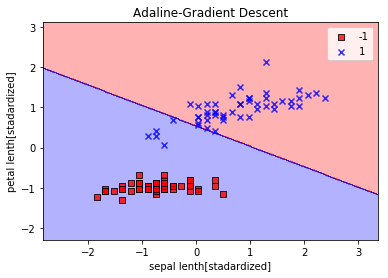

In [38]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(x_std, y)

plot_decision_regions(x_std, y, classifier=ada)
plt.title("Adaline-Gradient Descent")
plt.xlabel("sepal lenth[stadardized]")
plt.ylabel("petal lenth[stadardized]")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Adaline - Standardization')

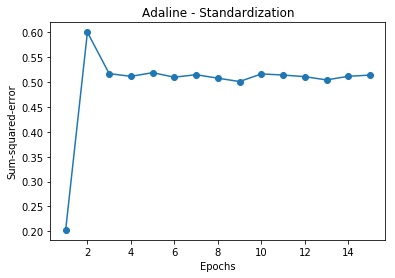

In [39]:
plt.plot(range(1, len(ada.cost_) +1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Standardization')

